# Bootstrap for univariate model parameter inference

In [23]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

ERROR:root:Line magic function `%scipy` not found.


### Exponential Distribution

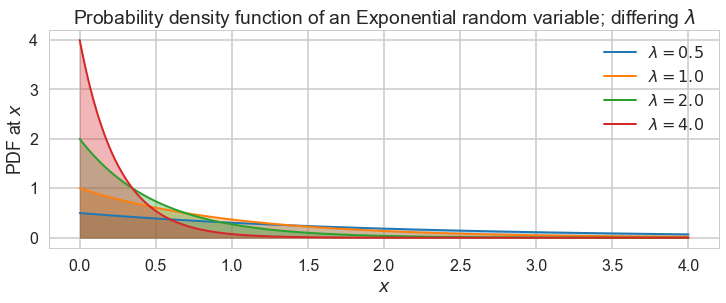

In [15]:
from scipy.stats import expon

x = np.linspace(0,4,500)
colors=sns.color_palette()

lambda_ = [0.5, 1, 2, 4]
plt.figure(figsize=(12,4))
for l,c in zip(lambda_,colors):
    plt.plot(x, expon.pdf(x, scale=1./l), lw=2, 
                color=c, label = "$\lambda = %.1f$"%l)
    plt.fill_between(x, expon.pdf(x, scale=1./l), color=c, alpha = .33)
    
plt.legend()
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

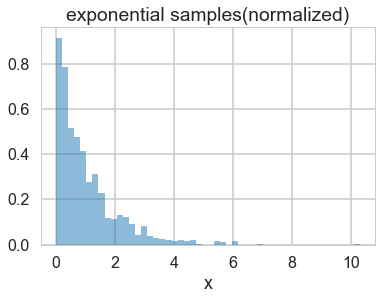

In [26]:
from scipy.stats import expon
plt.hist(expon.rvs(size=1000, scale=1./1.), normed= True, alpha=0.5, bins=50);
#if you remove normed=True you will get the actual number of samples
plt.xlabel("x")
plt.title("exponential samples(normalized)");

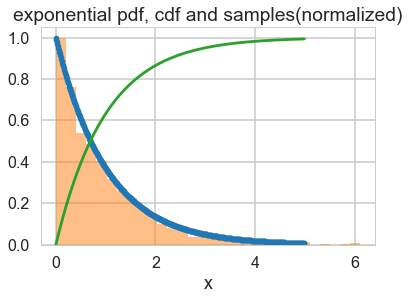

In [29]:
xpts = np.arange(0,5,0.01)
rv = expon(scale=1.0)
plt.plot(xpts,rv.pdf(xpts),'.')
plt.hist(rv.rvs(size=1000), normed=True, alpha=0.5, bins=30);
plt.plot(xpts, rv.cdf(xpts));
plt.xlabel("x")
plt.title("exponential pdf, cdf and samples(normalized)");

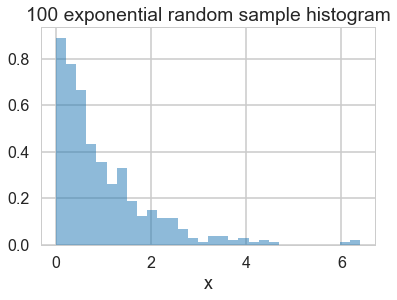

In [64]:
#generate random sample of exponential distribution
random_variable = expon(scale=1.0)
ramdom_varibale_sample = random_variable.rvs(size = 500)
plt.hist(ramdom_varibale_sample, normed=True, alpha=0.5, bins=30);
plt.xlabel("x")
plt.title("100 exponential random sample histogram");

In [66]:
#using MLE estimate parameter of this ramdom sample from MLE formula: estimated lamda = 1/mean of samples

scale = np.mean(ramdom_varibale_sample)
lamda_ = 1/scale

print(lamda_)


1.03482370318


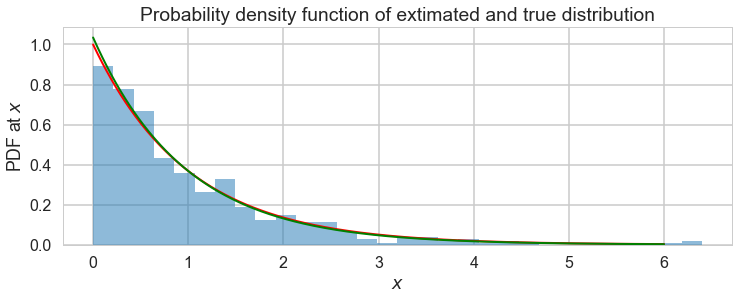

In [67]:
x = np.linspace(0,6,500)
colors=sns.color_palette()
plt.figure(figsize=(12,4))
plt.plot(x, expon.pdf(x, scale=1./1.0), lw=2, color="red", label = "$\lambda = 1.0$")
plt.plot(x, expon.pdf(x, scale=1./lamda_), lw=2, color="green", label = "$\estimated lambda = %.1f$"%lamda_)

plt.hist(ramdom_varibale_sample, normed=True, alpha=0.5, bins=30);
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Probability density function of extimated and true distribution");

0.999112585104 0.0129396736779


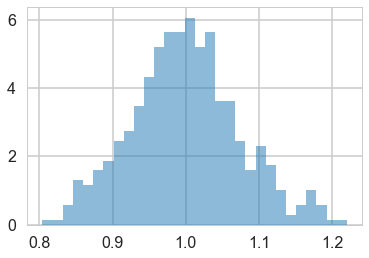

In [88]:
#doing bootstrap 
import numpy as np
import scipy as sp
import scipy.stats

random_sample = expon(scale=1./1.0)
M_samples = 500
N_points =  200
bootstrap_sample = rv.rvs(size=(M_samples, N_points))
sd_mean = np.mean(bootstrap_sample, axis=1)
sd_std = np.std(sd_mean)
sd_mean_mean = np.mean(sd_mean)
plt.hist(sd_mean, bins=30, normed=True, alpha=0.5);
sd_mean_mean

def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std = scipy.stats.sem(data)
    h = std * sp.stats.t._ppf((1+confidence)/2., n-1)
    return mean, 2*h

mean,interval_length = mean_confidence_interval(sd_mean)
print(mean,interval_length)

### Poisson Distribution

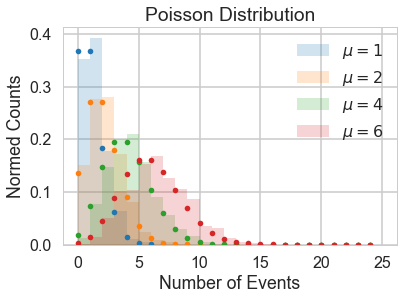

In [14]:
from scipy.stats import poisson
# generate samples for different values of mu
kpts=np.arange(0,25)
for mu, c in zip([1,2, 4, 6], sns.color_palette()[:4]):
    randomVariates = poisson.rvs(mu, size=1000)
    plt.hist(randomVariates, normed=True, color=c, alpha=0.2, bins=range(0,26), label='$\mu=' + np.str(mu) + '$')
    plt.plot(kpts, poisson.pmf(kpts, mu), '.', color=c)

plt.legend()
plt.title("Poisson Distribution")
plt.xlabel("Number of Events")
plt.ylabel("Normed Counts");